In [5]:
#PATH_TO_MODEL = "ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8"

In [6]:
#pip install Pillow==9.5.0

                                              0.0/2.5 MB ? eta -:--:--
     -----                                    0.3/2.5 MB 6.5 MB/s eta 0:00:01
     --------------                           0.9/2.5 MB 11.6 MB/s eta 0:00:01
     ------------------------                 1.5/2.5 MB 10.9 MB/s eta 0:00:01
     -------------------------------------    2.4/2.5 MB 13.9 MB/s eta 0:00:01
     ---------------------------------------- 2.5/2.5 MB 12.5 MB/s eta 0:00:00
  Attempting uninstall: Pillow
    Found existing installation: pillow 10.2.0
    Uninstalling pillow-10.2.0:
      Successfully uninstalled pillow-10.2.0
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\MSC1\\anaconda3\\envs\\OD\\Lib\\site-packages\\~il\\_imaging.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [7]:
#!python model_main_tf2.py --pipeline_config_path=training/TF2/training/{PATH_TO_MODEL}/pipeline.config --model_dir=training/TF2/training/{PATH_TO_MODEL} --checkpoint_dir=training/TF2/training/{PATH_TO_MODEL} --alsologtostderr

creating index...
index created!
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.35s).
Accumulating evaluation results...
DONE (t=0.11s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.605
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.886
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.712
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.380
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.634
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.498
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.679
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.698
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.000
 Av

C:\Users\MSC1\anaconda3\envs\OD\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
W0104 21:10:14.547606 10412 model_lib_v2.py:1062] Forced number of epochs for all eval validations to be 1.
INFO:tensorflow:Maybe overwriting sample_1_of_n_eval_examples: None
I0104 21:10:14.547606 10412 config_util.py:552] Maybe overwriting sample_1_of_n_eval_examples: None
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I0104 21:10:14.547606 10412 config_util.py:552] Maybe overwriting use_bfloat16: False
INFO:tensorflow:Maybe overwriting eval_num_epochs: 1
I010

In [ ]:
# !tensorboard --logdir=training/TF2/training/{PATH_TO_MODEL}/

#This code will launch Tensorboard.
# we can visualize from Chrome using the default address http://localhost:6006

In [16]:
"""
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
"""
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] ='2'
import pathlib
import tensorflow as tf

tf.get_logger().setLevel('ERROR')
gpus = tf.config.experimental.list_physical_devices('GPU')

In [18]:
#PATH_TO_MODEL_DIR = './training/TF2/pre-trained-models/{}/saved_model/'.format(PATH_TO_MODEL)

In [19]:
#print(PATH_TO_MODEL_DIR)

./training/TF2/pre-trained-models/ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8/saved_model/


In [20]:
#PATH_TO_LABELS = './data/label_map.pbtxt'

In [21]:
"""
import time
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils

PATH_TO_SAVED_MODEL = PATH_TO_MODEL_DIR

print('Loading Model...', end='')
start_time = time.time()

detect_fn = tf.saved_model.load(PATH_TO_SAVED_MODEL)

end_time = time.time()
elapsed_time = end_time - start_time
print('Done! Took {} seconds'.format(elapsed_time))

Loading Model...Done! Took 9.126597166061401 seconds


In [22]:
#category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS,use_display_name=True)

Running inference for test_images/EquusQuagga283.jpg... Done
Running inference for test_images/LoxodontaAfricana190.jpg... Done


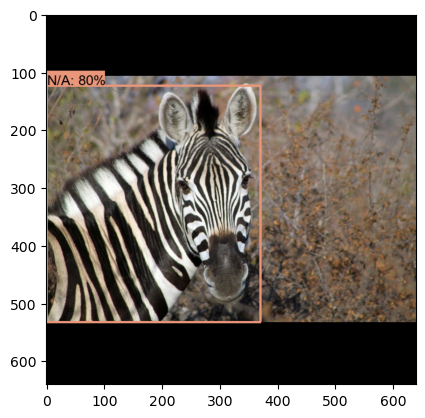

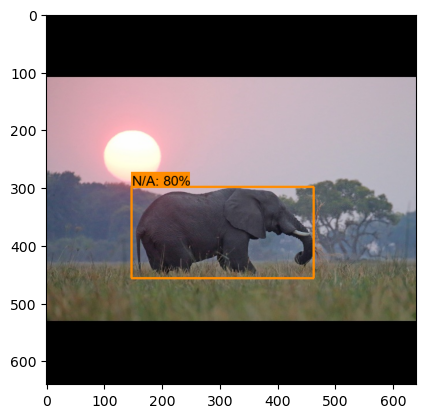

In [26]:
"""
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os
import warnings
IMAGE_PATHS = 'test_images/'
warnings.filterwarnings('ignore')

def load_image_into_numpy_array(path):
    return np.array(Image.open(path))

for image_path in os.listdir(IMAGE_PATHS):
    image_path = os.path.join(IMAGE_PATHS, image_path)
    print('Running inference for {}... '.format(image_path), end='')
    image_np =load_image_into_numpy_array(image_path)
    input_tensor = tf.convert_to_tensor(image_np)
    input_tensor = input_tensor[tf.newaxis, ...]
    
    detections = detect_fn(input_tensor)
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                  for key,value in detections.items()}
    detections['num_detections'] = num_detections
    
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)
    image_np_with_detections = image_np.copy()
    
    viz_utils.visualize_boxes_and_labels_on_image_array(
        image_np_with_detections,
        detections['detection_boxes'],
        detections['detection_classes'],
        detections['detection_scores'],
        category_index,
        use_normalized_coordinates=True,
        max_boxes_to_draw=200,
        min_score_thresh=.75,
        agnostic_mode=False)
    plt.figure()
    plt.imshow(image_np_with_detections)
    print('Done')
plt.show()

In [ ]:
"""Evalution was done seperately on tensorboard , attaching tensorboard sheets